# Imports

In [1]:
# Data Manipulation, Linear Algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

## Getting the Data

In [2]:
base_path = "../input/tabular-playground-series-jan-2022/"

train_data = pd.read_csv(base_path + "train.csv")
test_data = pd.read_csv(base_path + "test.csv")
sample_submission_data = pd.read_csv(base_path + "sample_submission.csv")

In [3]:
train_data.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
test_data.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


## Concatenating Training and Testing Data

In [5]:
full_data = pd.concat([train_data.iloc[:, :-1], test_data])
full_data.reset_index(drop=True, inplace=True)
full_data

,row_id,date,country,store,product
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...,...
32863,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat
32864,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker
32865,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug
32866,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat


## Feature Engineering

### Getting Year, Month and Day from Date

In [6]:
full_data["year"] = full_data["date"].apply(lambda x: int(x[:4]))
full_data["month"] = full_data["date"].apply(lambda x: int(x[5:7]))
full_data["day"] = full_data["date"].apply(lambda x: int(x[8:]))

# Dropping the "date" and "row_id" Column
full_data.drop(columns=["date", "row_id"], inplace=True)

In [7]:
full_data

,country,store,product,year,month,day
0,Finland,KaggleMart,Kaggle Mug,2015,1,1
1,Finland,KaggleMart,Kaggle Hat,2015,1,1
2,Finland,KaggleMart,Kaggle Sticker,2015,1,1
3,Finland,KaggleRama,Kaggle Mug,2015,1,1
4,Finland,KaggleRama,Kaggle Hat,2015,1,1
...,...,...,...,...,...,...
32863,Sweden,KaggleMart,Kaggle Hat,2019,12,31
32864,Sweden,KaggleMart,Kaggle Sticker,2019,12,31
32865,Sweden,KaggleRama,Kaggle Mug,2019,12,31
32866,Sweden,KaggleRama,Kaggle Hat,2019,12,31


# Analysis and EDA on FullData

In [8]:
def Pie_Bar_Plot(data, col):
    # Gettting Column Value Counts
    column_value_counts = full_data[col].value_counts()

    # Creating the explode values_list
    explode_len = len(column_value_counts) - 1
    explode = [0]
    for i in range(explode_len):
        explode.append(0.1)

    # Creating Subplots
    f, ax = plt.subplots(1, 2, figsize=(18, 8))

    # Pie Plot
    column_value_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(f'{col.capitalize()} Pie Plot', fontsize=16, fontweight="bold")
    ax[0].set_ylabel('')

    # Barplot / Count Plot
    sns.barplot(x=column_value_counts.index, y=column_value_counts.values, ax=ax[1])
    ax[1].set_title(f'{col.capitalize()} Count Plot', fontsize=16, fontweight="bold")
    plt.show()

    print("\n\n")

## Distribution Plots using Pie and Bar Plot

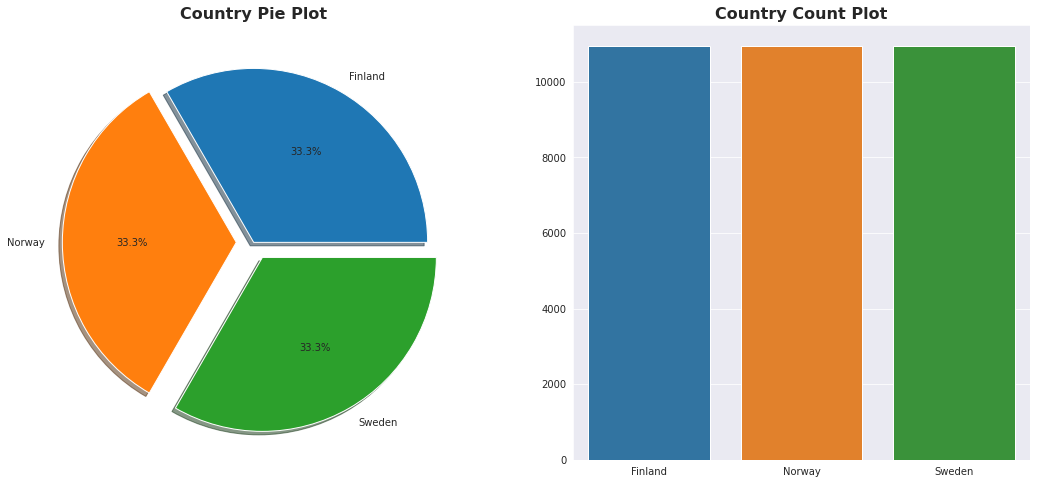

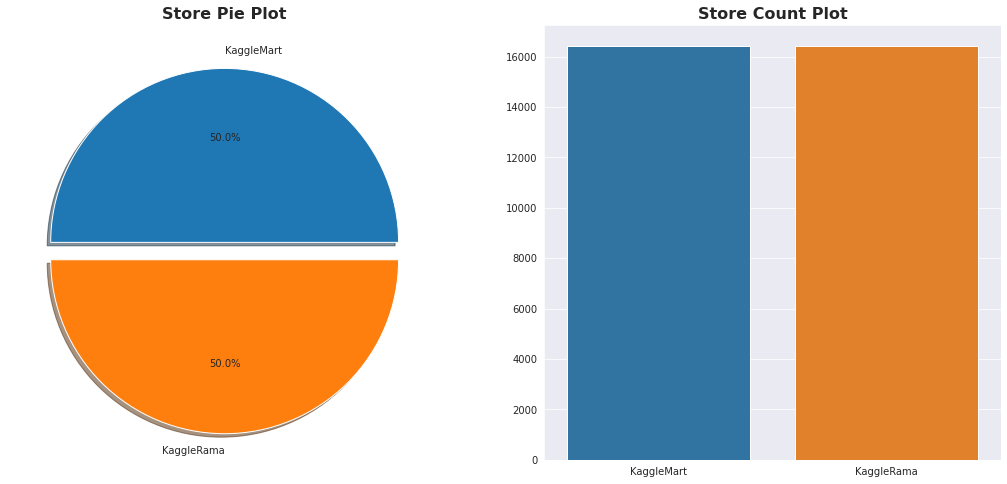

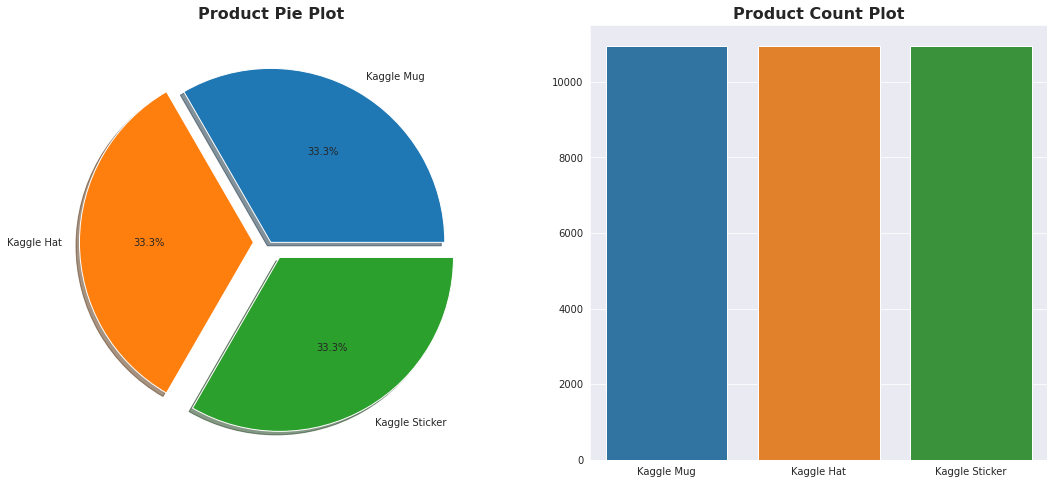

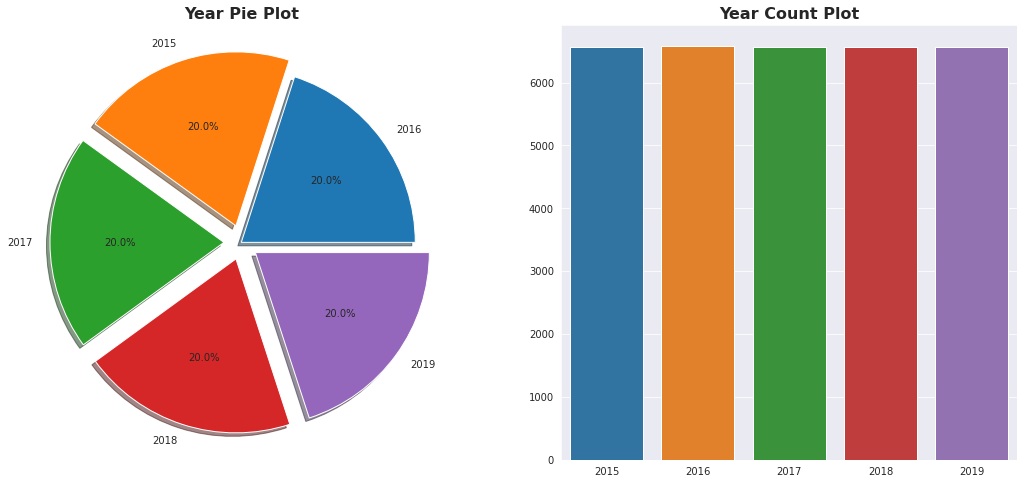

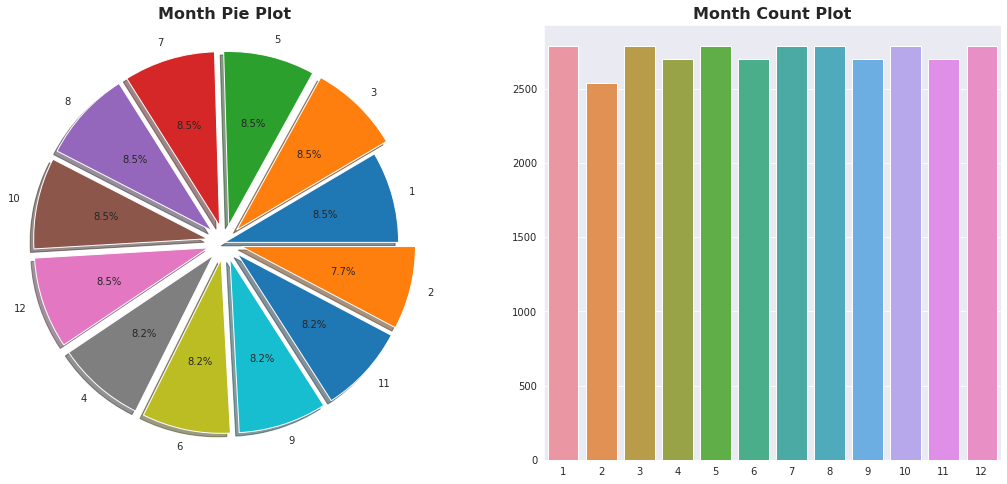

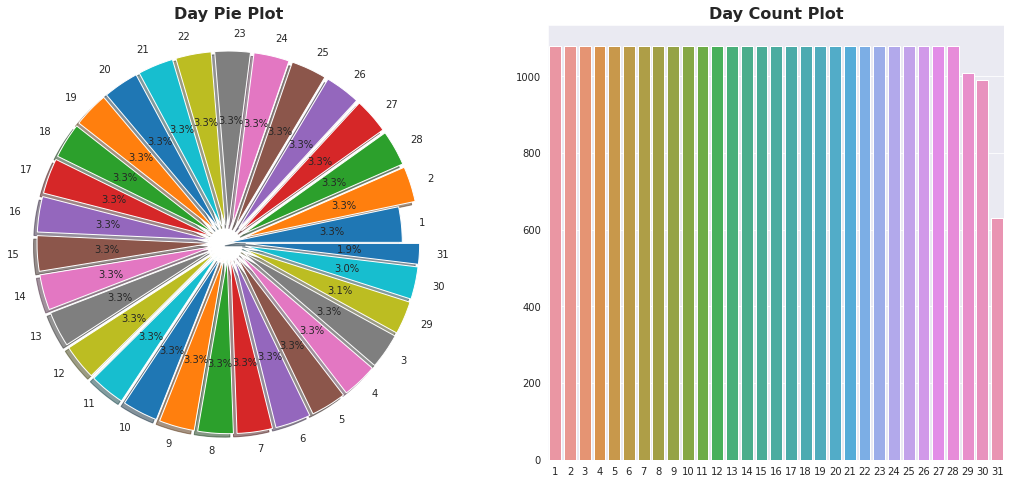

In [9]:
for col in full_data.columns:
    Pie_Bar_Plot(full_data, col)

## Crosstabs

In [10]:
pd.crosstab(full_data.country, full_data.store, margins=True).style.background_gradient(cmap='summer_r')

store,KaggleMart,KaggleRama,All
country,,,
Finland,5478,5478,10956
Norway,5478,5478,10956
Sweden,5478,5478,10956
All,16434,16434,32868


In [11]:
pd.crosstab(full_data.country, full_data.year, margins=True).style.background_gradient(cmap='summer_r')

year,2015,2016,2017,2018,2019,All
country,,,,,,
Finland,2190,2196,2190,2190,2190,10956
Norway,2190,2196,2190,2190,2190,10956
Sweden,2190,2196,2190,2190,2190,10956
All,6570,6588,6570,6570,6570,32868


In [12]:
pd.crosstab(full_data.country, full_data.month, margins=True).style.background_gradient(cmap='summer_r')

month,1,2,3,4,5,6,7,8,9,10,11,12,All
country,,,,,,,,,,,,,
Finland,930,846,930,900,930,900,930,930,900,930,900,930,10956
Norway,930,846,930,900,930,900,930,930,900,930,900,930,10956
Sweden,930,846,930,900,930,900,930,930,900,930,900,930,10956
All,2790,2538,2790,2700,2790,2700,2790,2790,2700,2790,2700,2790,32868


In [13]:
pd.crosstab(full_data.year, full_data.month, margins=True).style.background_gradient(cmap='summer_r')

month,1,2,3,4,5,6,7,8,9,10,11,12,All
year,,,,,,,,,,,,,
2015,558,504,558,540,558,540,558,558,540,558,540,558,6570
2016,558,522,558,540,558,540,558,558,540,558,540,558,6588
2017,558,504,558,540,558,540,558,558,540,558,540,558,6570
2018,558,504,558,540,558,540,558,558,540,558,540,558,6570
2019,558,504,558,540,558,540,558,558,540,558,540,558,6570
All,2790,2538,2790,2700,2790,2700,2790,2790,2700,2790,2700,2790,32868


## Year vs Number of Sales (for Training Data)

In [14]:
train_data["date"] = pd.to_datetime(train_data["date"])

Thanks to https://www.kaggle.com/vad13irt/tps-jan-2022-exploratory-data-analysis for plot idea below.

In [15]:
def Date_Sales_Plot(data, hue=None):
    plt.figure(figsize=(25, 6))
    sns.lineplot(data=train_data, x="date", y="num_sold", hue=hue, err_style=None)
    plt.xlabel("Date", fontsize=12, fontweight="bold")
    plt.ylabel("Products Sold", fontsize=12, fontweight="bold")
    plt.title("Date vs Products Sold", fontsize=16, fontweight="bold")
    if hue:
        plt.legend(fontsize=13, edgecolor=None, facecolor=None, markerscale=2, handlelength=1, title=None)
    plt.show()

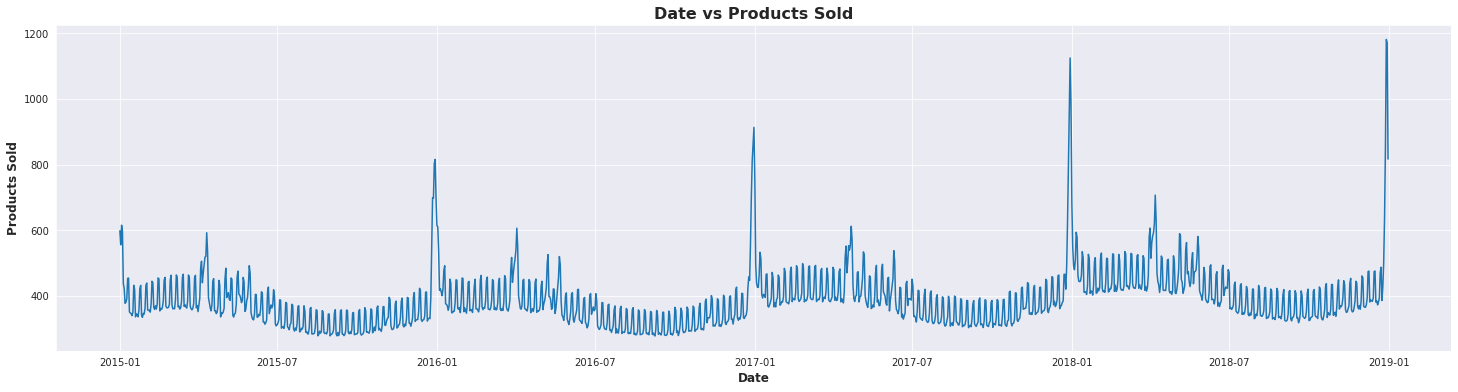

In [16]:
Date_Sales_Plot(train_data)

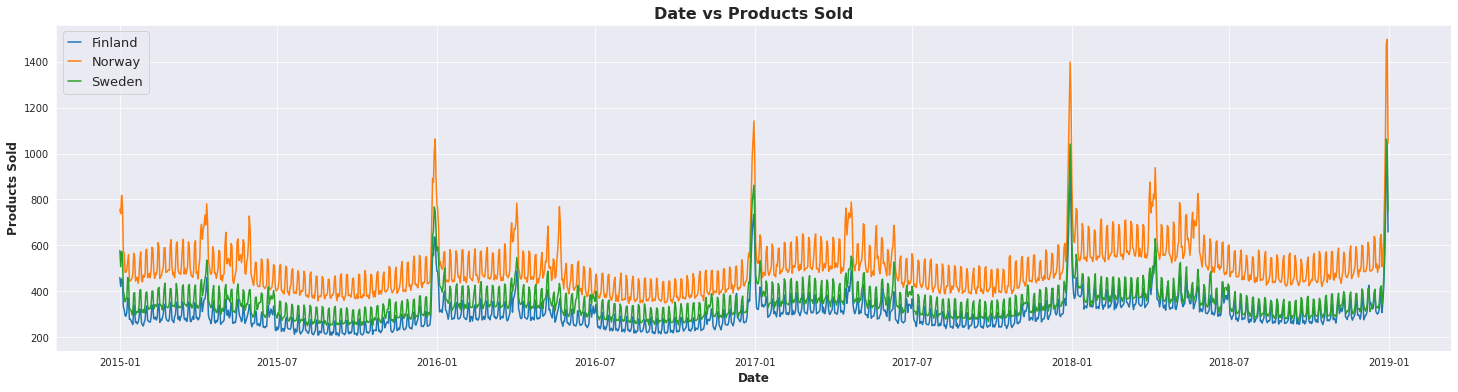

In [17]:
Date_Sales_Plot(train_data, "country")

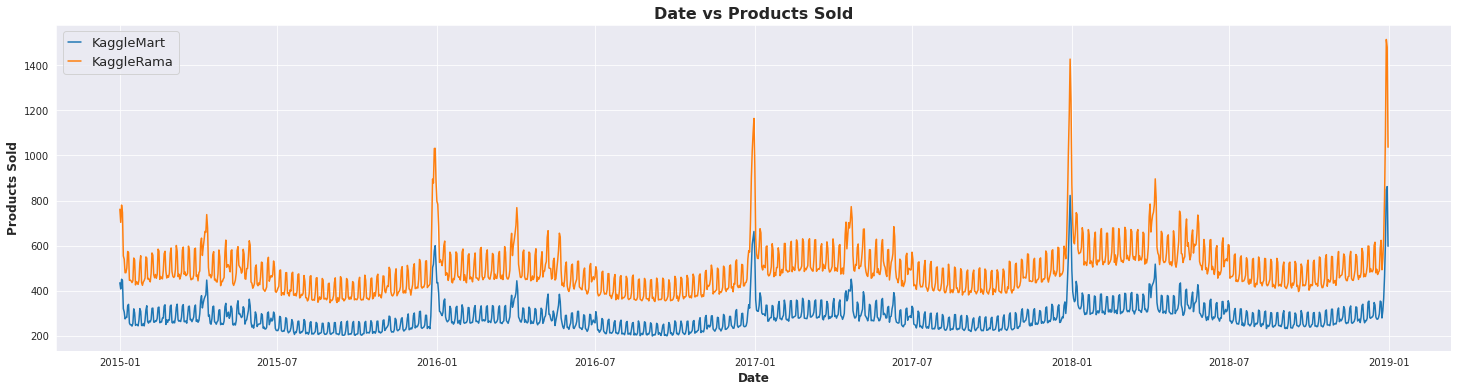

In [18]:
Date_Sales_Plot(train_data, "store")

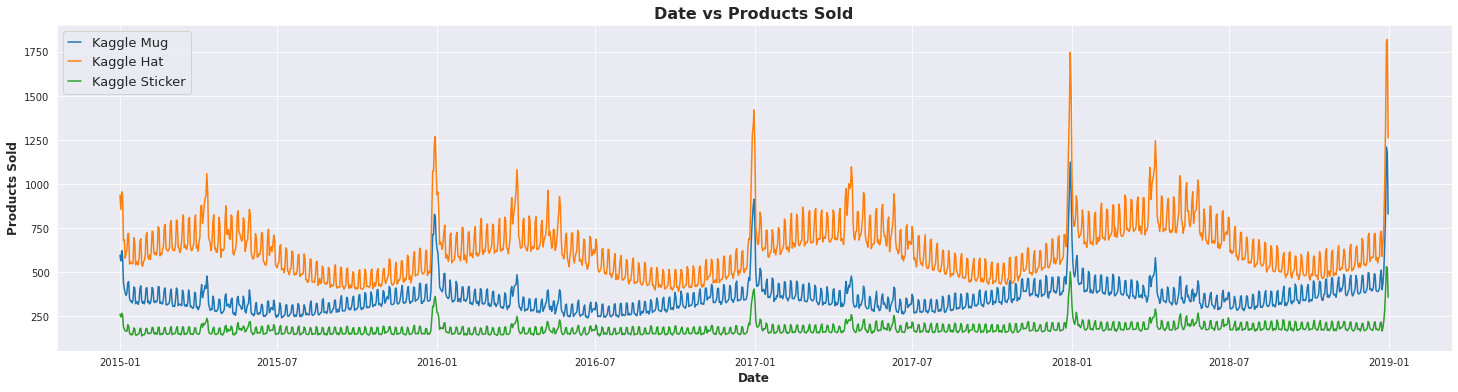

In [19]:
Date_Sales_Plot(train_data, "product")

# Preparing Data

## OneHotEncoding Categorical Variables

In [20]:
full_data = pd.concat([pd.get_dummies(full_data[["country", "store", "product"]]), full_data[["year", "month", "day"]]], axis=1)

In [21]:
# Getting only last two digits of the year
full_data["year"] = full_data["year"].apply(lambda x: int(str(x)[2:]))
full_data

,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker,year,month,day
0,1,0,0,1,0,0,1,0,15,1,1
1,1,0,0,1,0,1,0,0,15,1,1
2,1,0,0,1,0,0,0,1,15,1,1
3,1,0,0,0,1,0,1,0,15,1,1
4,1,0,0,0,1,1,0,0,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...
32863,0,0,1,1,0,1,0,0,19,12,31
32864,0,0,1,1,0,0,0,1,19,12,31
32865,0,0,1,0,1,0,1,0,19,12,31
32866,0,0,1,0,1,1,0,0,19,12,31


In [22]:
# Seperating Training and Testing Data
train = full_data.iloc[:len(train_data), :]
test = full_data.iloc[len(train_data):, :]

# Machine Learning Model

In [23]:
# Train Test Split for training and testing the Regressor
from sklearn.model_selection import train_test_split

# Different Mathematical functions to calculate the Accuracy of Regression Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Using CatBoostRegressor
from catboost import CatBoostRegressor

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train, train_data["num_sold"], test_size = 0.2, random_state=0)

In [25]:
# Initializing the Regressor
regressor = CatBoostRegressor(silent=True)

# Training the Regressor
regressor.fit(X_train, y_train)

# Predict the Values for X_test
y_pred = regressor.predict(X_test)

# Calculating R^2 Score
regressor_r2_score = r2_score(y_test, y_pred)

# Calculating Mean Squared Error
regressor_mse = mean_squared_error(y_test, y_pred)

# Calculating Root Mean Squared Error
regressor_rmse = np.sqrt(regressor_mse)

# Calculating Mean Absolute Error
regressor_mae = mean_absolute_error(y_test, y_pred)

In [26]:
print( f"""
Regressor Name                    : {regressor.__class__.__name__}

Regressor R^2 Score               : {regressor_r2_score}

Regressor Mean Squared Error      : {regressor_mse}

Regressor Root Mean Squared Error : {regressor_rmse}

Regressor Mean Absolute Error     : {regressor_mae}
""")


Regressor Name                    : CatBoostRegressor

Regressor R^2 Score               : 0.9665089613526443

Regressor Mean Squared Error      : 2368.841972840243

Regressor Root Mean Squared Error : 48.670750691151696

Regressor Mean Absolute Error     : 32.2384002338784



In [27]:
predictions = regressor.predict(test)
predictions

array([ 420.5270222 ,  624.46410939,  181.07735051, ..., 1081.59108406,
       1612.67242031,  431.3352568 ])

# Creating the Submission File

In [28]:
# Using Sample Submission file to create the Submission file
sample_submission_data["num_sold"] = predictions

# Saving the Submission file
sample_submission_data.to_csv("submission.csv", index=False)